In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Cleaned_Data.csv')
data.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Per Hour,Employee Provided,Min Salary,Max Salary,Average Salary,Python,R_studio,Spark,Excel,AWS,SQL
0,DATA SCIENTIST-HEALTHCARE,$56K - $96K (Glassdoor est.),The Data Scientist has a deep understanding of...,3.7,Premier Health,"Dayton, OH",0,0,56,56,56.0,0,1,0,0,0,0
1,Principal Data Scientist,$139K - $214K (Glassdoor est.),"Working out of our Chevy Chase, MD/Washington ...",3.5,GEICO,"Chevy Chase, MD",0,0,139,139,139.0,0,1,0,0,0,0
2,Senior Scientist,$68K - $97K (Glassdoor est.),Position Summary:\nThe Senior Scientist is a m...,3.5,LGC Limited,"Alexandria, MN",0,0,68,68,68.0,0,1,0,0,0,0
3,Staff Data Scientist,$114K - $144K (Glassdoor est.),Alteryx is searching for a Staff Data Scientis...,3.5,"Alteryx, Inc.","Boston, MA",0,0,114,114,114.0,0,1,0,0,0,0
4,Data Scientist,$120K - $121K (Glassdoor est.),Who Are We?\nQinetiQ Inc. is a leading innovat...,2.5,QinetiQ Inc.,"Lorton, VA",0,0,120,120,120.0,0,1,0,0,0,0


In [3]:
data.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Per Hour', 'Employee Provided',
       'Min Salary', 'Max Salary', 'Average Salary', 'Python', 'R_studio',
       'Spark', 'Excel', 'AWS', 'SQL'],
      dtype='object')

In [4]:
def title_simplifier(title):
    if 'data scientist' in title.lower() or 'scientist' in title.lower():
        return 'Data Scientist'
    elif 'data engineer' in title.lower():
        return 'Data Engineer'
    elif 'analyst' in title.lower():
        return 'Analyst'
    elif 'machine learning' in title.lower():
        return 'Machine Learning'
    elif 'director' in title.lower():
        return 'Director'
    elif 'manager' in title.lower():
        return 'Manager'
    else:
        return 'n/a'
    


In [5]:
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'principal' in title.lower() or 'lead' in title.lower():
        return 'Senior'
    elif 'jr' in title.lower() or 'junior' in title.lower():
        return 'Junior'
    else:
        return 'n/a'

In [6]:
data['Title'] = data['Job Title'].apply(title_simplifier)
data['Seniority'] = data['Job Title'].apply(seniority)
data['Seniority'].value_counts()


n/a       18
Senior     4
Name: Seniority, dtype: int64

In [7]:
data['desc_len'] = data['Job Description'].apply(lambda x: len(x))
data['min_salary'] = data['Min Salary']
data['max_salary'] = data['Max Salary']

data['hourly'] = data['Per Hour']

In [8]:
data['min_salary'] = data.apply(lambda x: x.min_salary*2 if x.hourly == 1 else x.min_salary, axis=1)
data['max_salary'] = data.apply(lambda x: x.max_salary*2 if x.hourly == 1 else x.max_salary, axis=1)



In [9]:
data[data.hourly==1][['hourly', 'min_salary', 'max_salary']]

,hourly,min_salary,max_salary
9,1,48,48
18,1,34,34


In [10]:
data.describe()

,Rating,Per Hour,Employee Provided,Min Salary,Max Salary,Average Salary,Python,R_studio,Spark,Excel,AWS,SQL,desc_len,min_salary,max_salary,hourly
count,22.000000,22.000000,22.0,22.000000,22.000000,22.000000,22.000000,22.0,22.0,22.000000,22.0,22.000000,22.000000,22.000000,22.000000,22.000000
mean,3.368182,0.090909,0.0,68.045455,68.045455,68.045455,0.045455,1.0,0.0,0.136364,0.0,0.045455,1109.545455,69.909091,69.909091,0.090909
std,1.142006,0.294245,0.0,30.973840,30.973840,30.973840,0.213201,0.0,0.0,0.351250,0.0,0.213201,770.379605,28.523856,28.523856,0.294245
min,-1.000000,0.000000,0.0,17.000000,17.000000,17.000000,0.000000,1.0,0.0,0.000000,0.0,0.000000,2.000000,34.000000,34.000000,0.000000
25%,3.425000,0.000000,0.0,45.750000,45.750000,45.750000,0.000000,1.0,0.0,0.000000,0.0,0.000000,728.250000,48.750000,48.750000,0.000000
50%,3.500000,0.000000,0.0,64.500000,64.500000,64.500000,0.000000,1.0,0.0,0.000000,0.0,0.000000,941.000000,64.500000,64.500000,0.000000
75%,3.800000,0.000000,0.0,80.500000,80.500000,80.500000,0.000000,1.0,0.0,0.000000,0.0,0.000000,1224.500000,80.500000,80.500000,0.000000
max,4.700000,1.000000,0.0,139.000000,139.000000,139.000000,1.000000,1.0,0.0,1.000000,0.0,1.000000,3503.000000,139.000000,139.000000,1.000000


In [11]:
data.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Per Hour', 'Employee Provided',
       'Min Salary', 'Max Salary', 'Average Salary', 'Python', 'R_studio',
       'Spark', 'Excel', 'AWS', 'SQL', 'Title', 'Seniority', 'desc_len',
       'min_salary', 'max_salary', 'hourly'],
      dtype='object')

<AxesSubplot:>

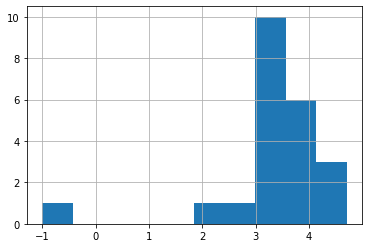

In [12]:
data['Rating'].hist()

<AxesSubplot:>

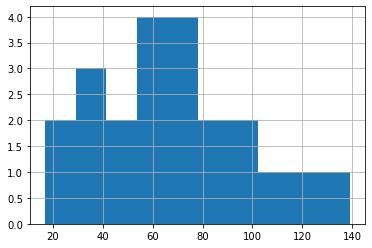

In [13]:
# data['avg_salary'].hist()
data['avg_salary'] = data['Average Salary']
data['avg_salary'].hist()

<AxesSubplot:>

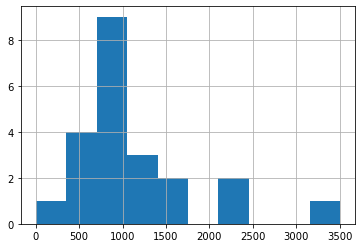

In [14]:
data['desc_len'].hist()

<AxesSubplot:>

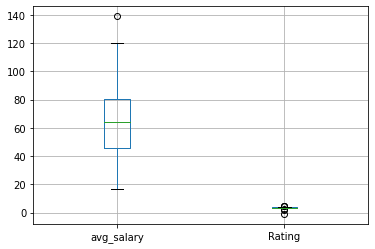

In [15]:
data.boxplot(column=['avg_salary','Rating'])

In [16]:
data[['avg_salary','Rating','min_salary','max_salary']].corr()

,avg_salary,Rating,min_salary,max_salary
avg_salary,1.000000,0.082970,0.982145,0.982145
Rating,0.082970,1.000000,0.071245,0.071245
min_salary,0.982145,0.071245,1.000000,1.000000
max_salary,0.982145,0.071245,1.000000,1.000000


In [17]:
data.head(1)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Per Hour,Employee Provided,Min Salary,Max Salary,...,Excel,AWS,SQL,Title,Seniority,desc_len,min_salary,max_salary,hourly,avg_salary
0,DATA SCIENTIST-HEALTHCARE,$56K - $96K (Glassdoor est.),The Data Scientist has a deep understanding of...,3.7,Premier Health,"Dayton, OH",0,0,56,56,...,0,0,0,Data Scientist,n/a,438,56,56,0,56.0


In [18]:
data = data[['Title','Rating','Job Description', 'Company Name','Location','Employee Provided','Python','Excel','AWS','SQL','Seniority','desc_len','min_salary','max_salary','avg_salary','hourly']]
data

,Title,Rating,Job Description,Company Name,Location,Employee Provided,Python,Excel,AWS,SQL,Seniority,desc_len,min_salary,max_salary,avg_salary,hourly
0,Data Scientist,3.7,The Data Scientist has a deep understanding of...,Premier Health,"Dayton, OH",0,0,0,0,0,n/a,438,56,56,56.0,0
1,Data Scientist,3.5,"Working out of our Chevy Chase, MD/Washington ...",GEICO,"Chevy Chase, MD",0,0,0,0,0,Senior,972,139,139,139.0,0
2,Data Scientist,3.5,Position Summary:\nThe Senior Scientist is a m...,LGC Limited,"Alexandria, MN",0,0,0,0,0,Senior,975,68,68,68.0,0
3,Data Scientist,3.5,Alteryx is searching for a Staff Data Scientis...,"Alteryx, Inc.","Boston, MA",0,0,0,0,0,n/a,1243,114,114,114.0,0
4,Data Scientist,2.5,Who Are We?\nQinetiQ Inc. is a leading innovat...,QinetiQ Inc.,"Lorton, VA",0,0,0,0,0,n/a,1084,120,120,120.0,0
5,Data Scientist,3.4,Classification:\nSalary\nJob Description:\nAre...,Laticrete International,"Bethany, CT",0,0,0,0,0,Senior,549,75,75,75.0,0
6,Data Scientist,3.1,The Research department is seeking a qualified...,"INFICON, Inc.","East Syracuse, NY",0,0,0,0,0,n/a,944,51,51,51.0,0
7,Data Scientist,3.5,"LGC, Biosearch Technologies is seeking a detai...",LGC Limited,"Middleton, WI",0,0,0,0,0,n/a,717,62,62,62.0,0
8,Data Scientist,3.5,"LGC, Biosearch Technologies is looking for a h...",LGC Limited,"Middleton, WI",0,0,0,0,0,Senior,938,98,98,98.0,0
9,Data Scientist,3.8,White Plains Hospital Job Description\nTitle: ...,White Plains Hospital,"White Plains, NY",0,0,0,0,0,n/a,479,48,48,24.0,1


Graph for Title: = 3


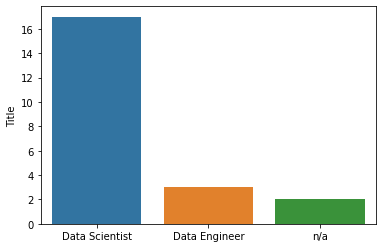

Graph for Rating: = 13


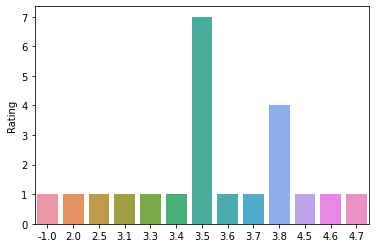

Graph for Job Description: = 22


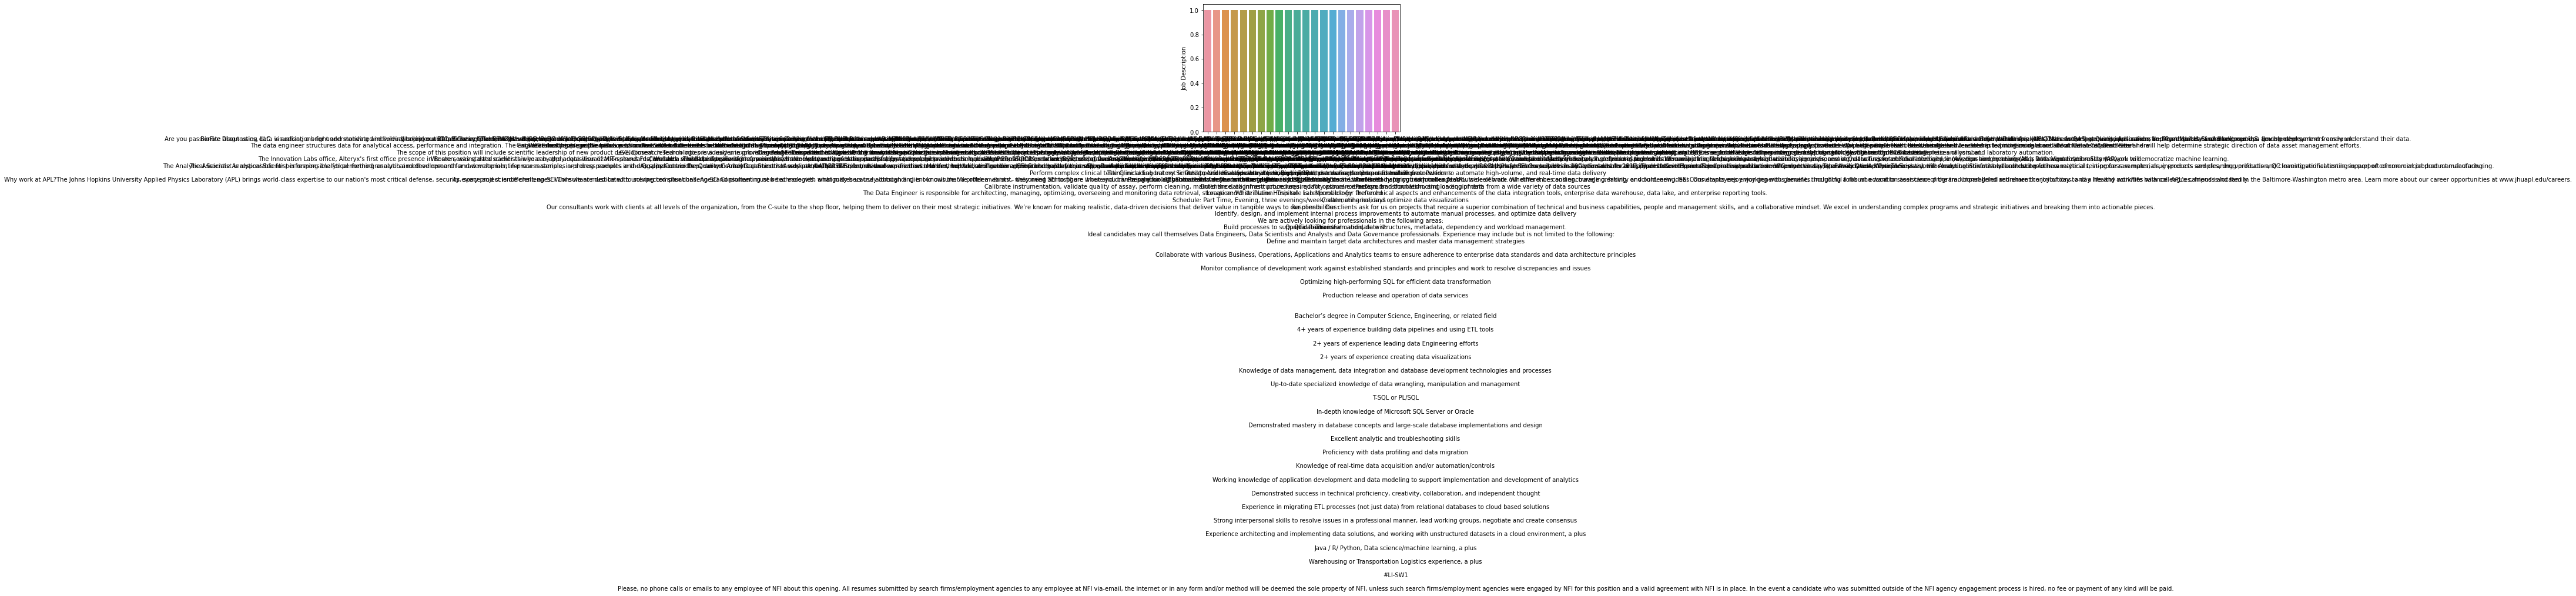

Graph for Company Name: = 18


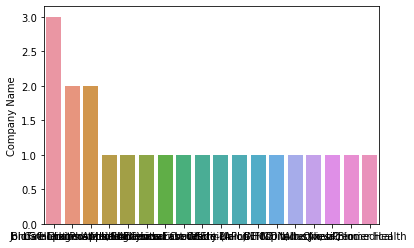

Graph for Location: = 19


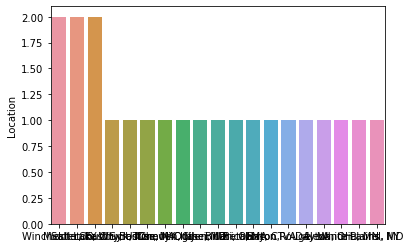

Graph for Employee Provided: = 1


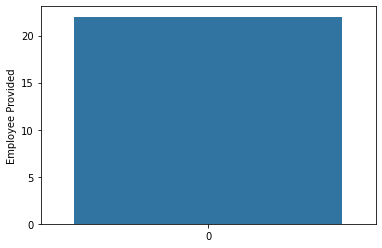

Graph for Python: = 2


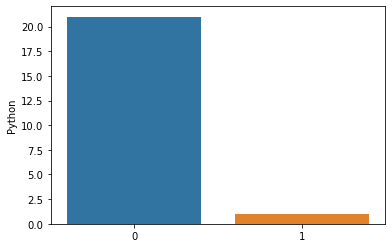

Graph for Excel: = 2


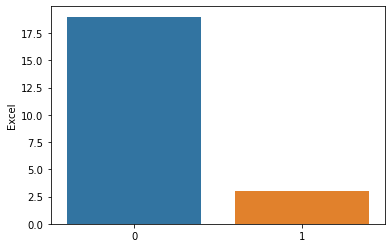

Graph for AWS: = 1


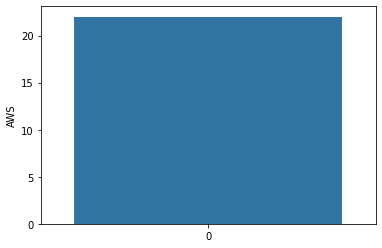

Graph for SQL: = 2


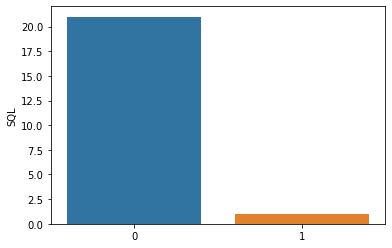

Graph for Seniority: = 2


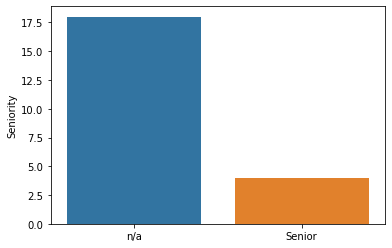

Graph for desc_len: = 22


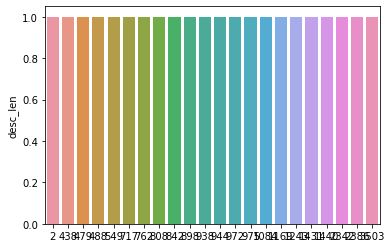

Graph for min_salary: = 21


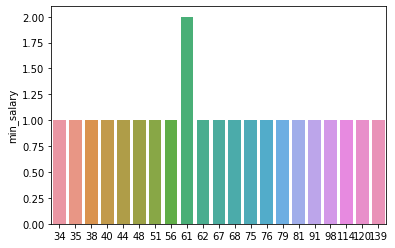

Graph for max_salary: = 21


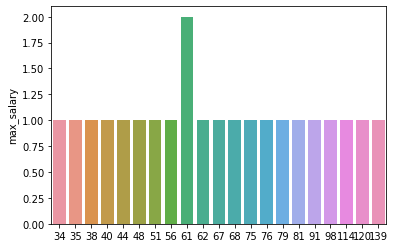

Graph for avg_salary: = 21


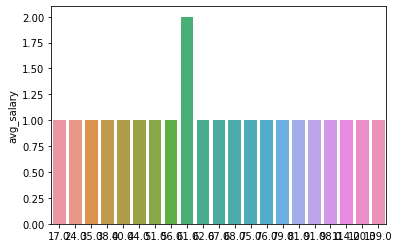

Graph for hourly: = 2


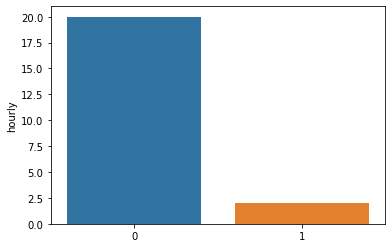

In [19]:
for i in data.columns:
    df = data[i].value_counts()
    sns.barplot(x=df.index, y=df)
    print('Graph for %s: = %d' %(i, len(df)))
    plt.show()

Graph for Title: = 3


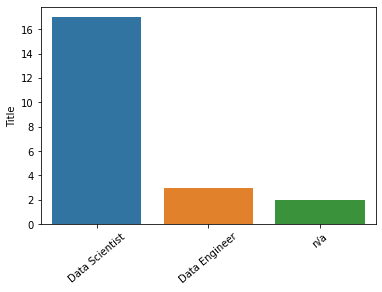

Graph for Rating: = 13


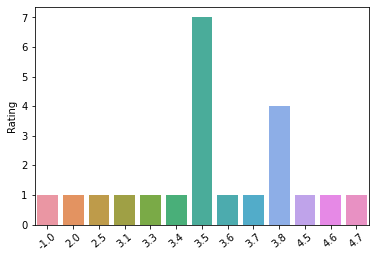

Graph for Job Description: = 22


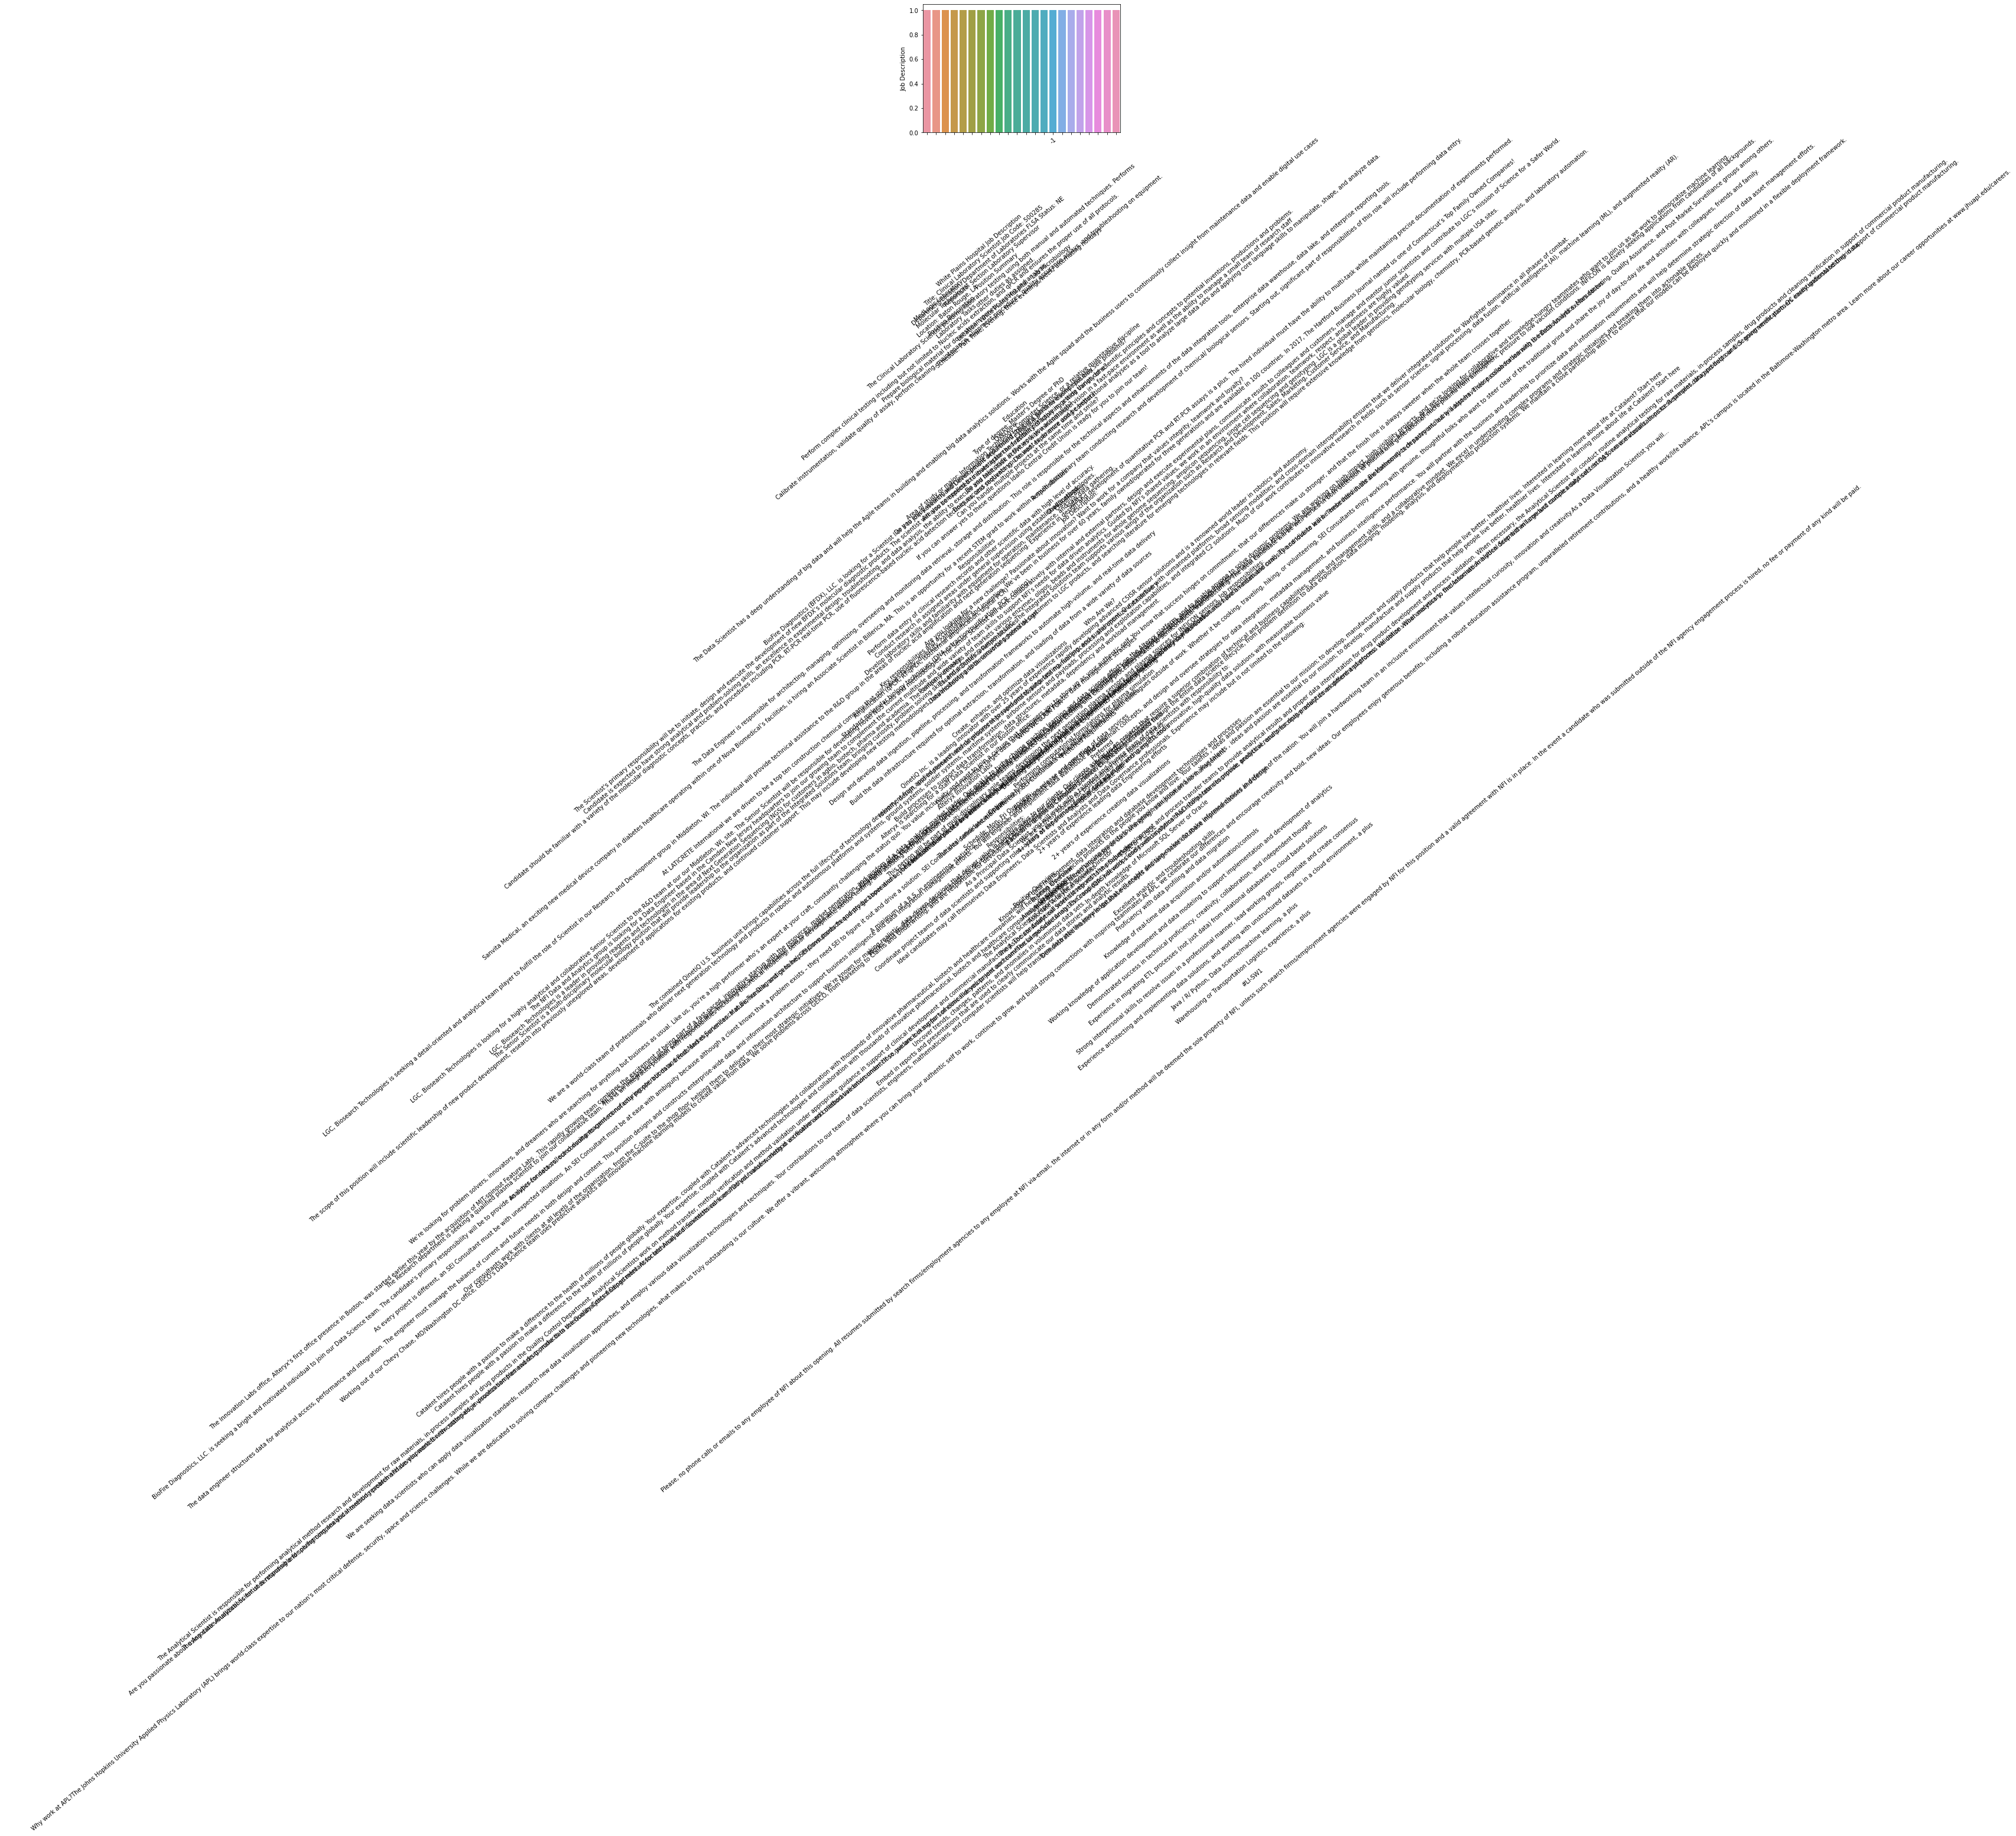

Graph for Company Name: = 18


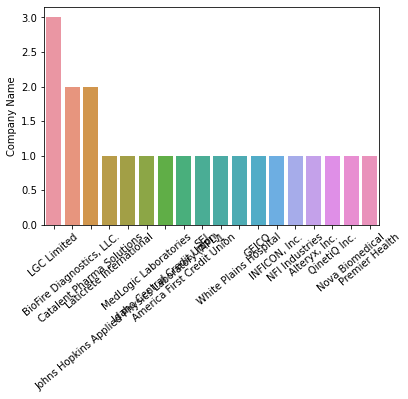

Graph for Location: = 19


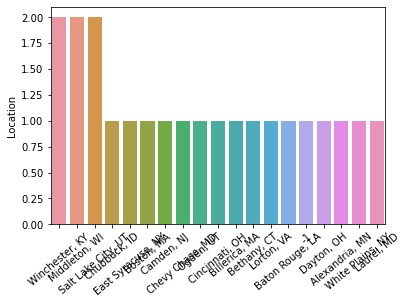

Graph for Employee Provided: = 1


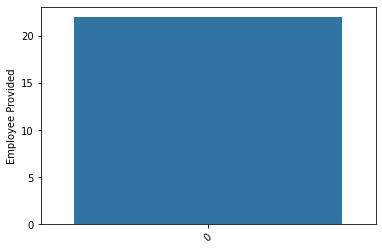

Graph for Python: = 2


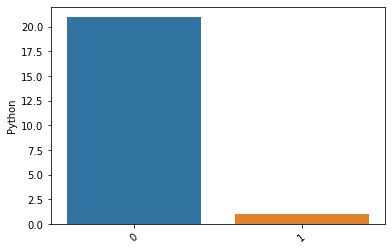

Graph for Excel: = 2


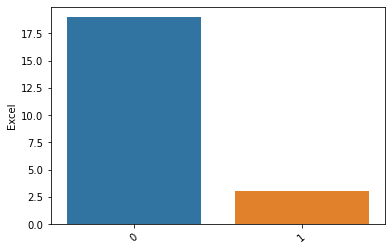

Graph for AWS: = 1


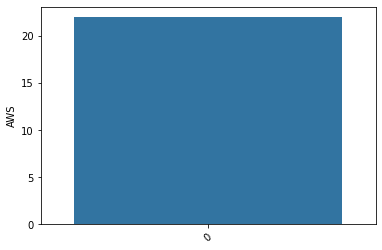

Graph for SQL: = 2


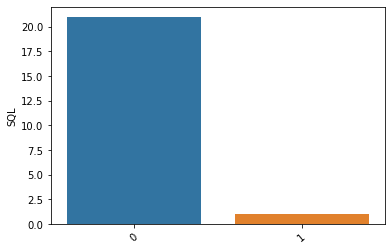

Graph for Seniority: = 2


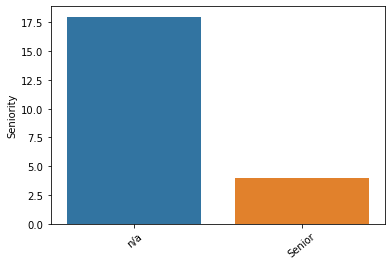

Graph for desc_len: = 22


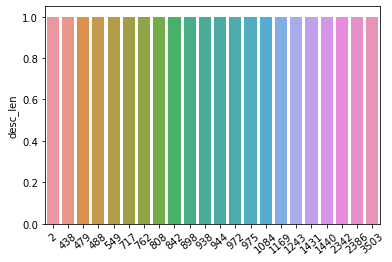

Graph for min_salary: = 21


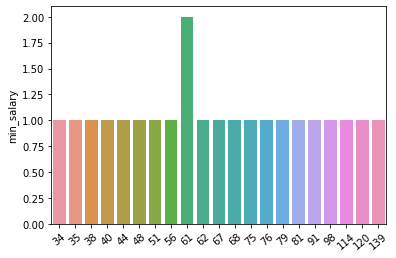

Graph for max_salary: = 21


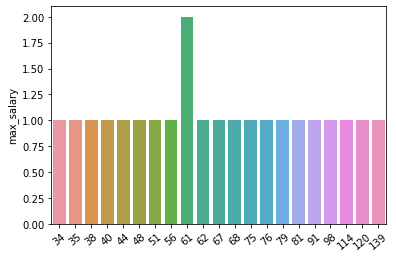

Graph for avg_salary: = 21


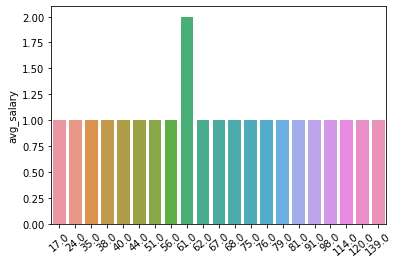

Graph for hourly: = 2


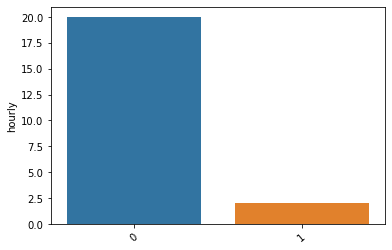

In [20]:
for i in data.columns:
    df = data[i].value_counts()
    datax = sns.barplot(x=df.index, y=df)
    datax.set_xticklabels(datax.get_xticklabels(),rotation=40)
    print('Graph for %s: = %d' %(i, len(df)))
#     print(df)   
    plt.show()

In [21]:
pd.pivot_table(data, index='Title', values='avg_salary')

,avg_salary
Title,
Data Engineer,60.333333
Data Scientist,69.058824
n/a,71.000000


In [22]:
pd.pivot_table(data, index=['Title','Rating'], values='avg_salary')

avg_salary
Title          Rating            
Data Engineer   3.3     76.000000
                3.8     44.000000
                4.5     61.000000
Data Scientist  2.0     17.000000
                2.5    120.000000
                3.1     51.000000
                3.4     75.000000
                3.5     79.857143
                3.6     35.000000
                3.7     56.000000
                3.8     60.666667
                4.7     79.000000
n/a            -1.0     61.000000
                4.6     81.000000

In [23]:
pd.pivot_table(data, index=['Title','Seniority','Location'], values='avg_salary').sort_values('avg_salary', ascending=False)

avg_salary
Title          Seniority Location                      
Data Scientist Senior    Chevy Chase, MD          139.0
               n/a       Lorton, VA               120.0
                         Boston, MA               114.0
               Senior    Middleton, WI             98.0
n/a            n/a       Cincinnati, OH            81.0
Data Scientist n/a       Salt Lake City, UT        79.0
                         Laurel, MD                79.0
Data Engineer  n/a       Camden, NJ                76.0
Data Scientist Senior    Bethany, CT               75.0
                         Alexandria, MN            68.0
               n/a       Middleton, WI             62.0
Data Engineer  n/a       Chubbuck, ID              61.0
n/a            n/a       -1                        61.0
Data Scientist n/a       Dayton, OH                56.0
                         East Syracuse, NY         51.0
Data Engineer  n/a       Ogden, UT                 44.0
Data Scientist n/a       Winchester, KY            39.0
                         Billerica, MA             35.0
                         White Plains, NY          24.0
                         Baton Rouge, LA           17.0

In [24]:
pd.pivot_table(data, index=['Title','Seniority','Location'], values='avg_salary', aggfunc='count').sort_values('avg_salary', ascending=False)

avg_salary
Title          Seniority Location                      
Data Scientist n/a       Winchester, KY               2
                         Salt Lake City, UT           2
Data Engineer  n/a       Camden, NJ                   1
                         Chubbuck, ID                 1
n/a            n/a       -1                           1
Data Scientist n/a       White Plains, NY             1
                         Middleton, WI                1
                         Lorton, VA                   1
                         Laurel, MD                   1
                         East Syracuse, NY            1
                         Dayton, OH                   1
                         Boston, MA                   1
                         Billerica, MA                1
                         Baton Rouge, LA              1
               Senior    Middleton, WI                1
                         Chevy Chase, MD              1
                         Bethany, CT                  1
                         Alexandria, MN               1
Data Engineer  n/a       Ogden, UT                    1
n/a            n/a       Cincinnati, OH               1

In [25]:
pd.pivot_table(data[data.Title == 'Data Scientist'], index=['Title','Location'], values='avg_salary').sort_values('avg_salary', ascending=False)

avg_salary
Title          Location                      
Data Scientist Chevy Chase, MD          139.0
               Lorton, VA               120.0
               Boston, MA               114.0
               Middleton, WI             80.0
               Laurel, MD                79.0
               Salt Lake City, UT        79.0
               Bethany, CT               75.0
               Alexandria, MN            68.0
               Dayton, OH                56.0
               East Syracuse, NY         51.0
               Winchester, KY            39.0
               Billerica, MA             35.0
               White Plains, NY          24.0
               Baton Rouge, LA           17.0

In [26]:
data

,Title,Rating,Job Description,Company Name,Location,Employee Provided,Python,Excel,AWS,SQL,Seniority,desc_len,min_salary,max_salary,avg_salary,hourly
0,Data Scientist,3.7,The Data Scientist has a deep understanding of...,Premier Health,"Dayton, OH",0,0,0,0,0,n/a,438,56,56,56.0,0
1,Data Scientist,3.5,"Working out of our Chevy Chase, MD/Washington ...",GEICO,"Chevy Chase, MD",0,0,0,0,0,Senior,972,139,139,139.0,0
2,Data Scientist,3.5,Position Summary:\nThe Senior Scientist is a m...,LGC Limited,"Alexandria, MN",0,0,0,0,0,Senior,975,68,68,68.0,0
3,Data Scientist,3.5,Alteryx is searching for a Staff Data Scientis...,"Alteryx, Inc.","Boston, MA",0,0,0,0,0,n/a,1243,114,114,114.0,0
4,Data Scientist,2.5,Who Are We?\nQinetiQ Inc. is a leading innovat...,QinetiQ Inc.,"Lorton, VA",0,0,0,0,0,n/a,1084,120,120,120.0,0
5,Data Scientist,3.4,Classification:\nSalary\nJob Description:\nAre...,Laticrete International,"Bethany, CT",0,0,0,0,0,Senior,549,75,75,75.0,0
6,Data Scientist,3.1,The Research department is seeking a qualified...,"INFICON, Inc.","East Syracuse, NY",0,0,0,0,0,n/a,944,51,51,51.0,0
7,Data Scientist,3.5,"LGC, Biosearch Technologies is seeking a detai...",LGC Limited,"Middleton, WI",0,0,0,0,0,n/a,717,62,62,62.0,0
8,Data Scientist,3.5,"LGC, Biosearch Technologies is looking for a h...",LGC Limited,"Middleton, WI",0,0,0,0,0,Senior,938,98,98,98.0,0
9,Data Scientist,3.8,White Plains Hospital Job Description\nTitle: ...,White Plains Hospital,"White Plains, NY",0,0,0,0,0,n/a,479,48,48,24.0,1


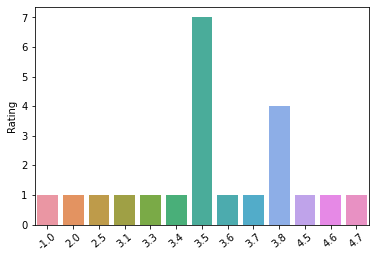

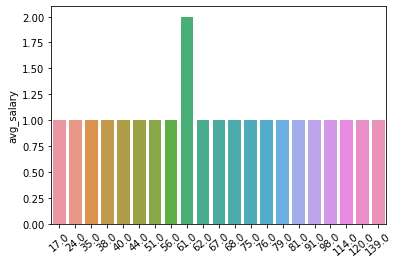

In [27]:

for i in data[['Rating', 'avg_salary']]:
    df = data[i].value_counts()
    xlabel = sns.barplot(x=df.index, y=df)
    xlabel.set_xticklabels(xlabel.get_xticklabels(),rotation=40)
    plt.show()

In [28]:
df_pivots = pd.pivot_table(data, index=['Rating'], values='avg_salary')
df_pivots

,avg_salary
Rating,
-1.0,61.000000
2.0,17.000000
2.5,120.000000
3.1,51.000000
3.3,76.000000
3.4,75.000000
3.5,79.857143
3.6,35.000000
3.7,56.000000


In [29]:

datax = data[['Title','Job Description', 'Rating','Company Name','Location','Employee Provided','Python','Excel','AWS','SQL','Seniority','desc_len','hourly','avg_salary']]

# pd.pivot_table(data, index=data, values='avg_salary')    

for i in datax.columns:
    if i == 'avg_salary':
        pass
    else:
        print(i, '\n')
        print(pd.pivot_table(datax, index=i, values='avg_salary'))
        print('\n')
        
    
#     pd.pivot_table(data, index=i, values='avg_salary')
#     pivot

Title 

                avg_salary
Title                     
Data Engineer    60.333333
Data Scientist   69.058824
n/a              71.000000


Job Description 

                                                    avg_salary
Job Description                                               
-1                                                        61.0
Alteryx is searching for a Staff Data Scientist...       114.0
Are you passionate about using data visualizati...        79.0
BioFire Diagnostics (BFDX), LLC. is looking for...        67.0
BioFire Diagnostics, LLC. is seeking a bright a...        91.0
Classification:\nSalary\nJob Description:\nAre ...        75.0
LGC, Biosearch Technologies is looking for a hi...        98.0
LGC, Biosearch Technologies is seeking a detail...        62.0
MedLogic Laboratory\nMolecular Technologist\nLo...        17.0
Overview:\nDo you enjoy working with other peop...        61.0
Position Overview:\nCatalent hires people with ...        40.0
Position Overview:

In [30]:
pd.pivot_table(data,index='Location',columns='Python', values='avg_salary',aggfunc='count')

Python,0,1
Location,,
-1,1.0,NaN
"Alexandria, MN",1.0,NaN
"Baton Rouge, LA",1.0,NaN
"Bethany, CT",1.0,NaN
"Billerica, MA",1.0,NaN
"Boston, MA",1.0,NaN
"Camden, NJ",NaN,1.0
"Chevy Chase, MD",1.0,NaN
"Chubbuck, ID",1.0,NaN


In [31]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [32]:
data.columns

Index(['Title', 'Rating', 'Job Description', 'Company Name', 'Location',
       'Employee Provided', 'Python', 'Excel', 'AWS', 'SQL', 'Seniority',
       'desc_len', 'min_salary', 'max_salary', 'avg_salary', 'hourly'],
      dtype='object')

In [33]:
# words = " ".join(data['Job Description'])

# def punctuation_stop(text):
#     filtered = []
#     stop_words = set(stopwords.words('english'))
#     word_tokens = word_tokenize(text)
#     for w in word_tokens:
#         if w not in stop_words and w.isalpha():
#             filtered.append(w.lower())
#     return filtered

# words_filtered = punctuation_stop(words)

# text = " ".join([ele for ele in words_filtered])
# wc = WordCloud(background_color = "white", random_state =1 , mask=mask_logo,stopwords= STOPWORDS, max_words = 2000, width=800, height=800)
# wc.generate(text)

# plt.figure(figsize=[10,10])
# plt.imshow(wc,interpolation="bilinear")
# plt.axis('off')
# plt.show()